#  1. Crie o Ambiente Virtual
```python -m venv venv```

# 2. Ative o Ambiente Virtual
- Windows (Prompt de Comando):
```.\venv\Scripts\activate```
- Windows (PowerShell):
```venv\Scripts\Activate.ps1```
- macOS/Linux:
```source venv/bin/activate```

# 3. Instale o Kernel Jupyter no Ambiente Virtual
```%pip install --upgrade ipykernel```

In [16]:
%pip install --upgrade -r requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 45.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 31.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 53.8 MB/s eta 0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ----------------------------

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Kaggle Dataset
# Bank Customer Churn
# https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

df = pd.read_csv('data/bank-customer-churn-records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# About Dataset
- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [35]:
# Valores nulos
df.isnull().sum()

rownumber             0
customerid            0
surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
complain              0
satisfaction_score    0
card_type             0
point_earned          0
dtype: int64

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [34]:
# Padronizar o nome das colunas
df.columns = df.columns.str.replace(' ','_').str.lower()
df_columns = df.columns.tolist()
df_columns


['rownumber',
 'customerid',
 'surname',
 'creditscore',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'exited',
 'complain',
 'satisfaction_score',
 'card_type',
 'point_earned']

In [33]:
# Valores únicos das variáveis categóricas
for col in ['geography', 'gender', 'card_type']:
    print(f"Unique values in {col}:", df[col].unique())

Unique values in geography: ['France' 'Spain' 'Germany']
Unique values in gender: ['Female' 'Male']
Unique values in card_type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [40]:
# Colunas numéricas
numerics = ['int16', 'int32', 'int64', 'float16','float32','float64']

df_numeric = df.select_dtypes(include=numerics)
df_numeric.drop(['rownumber','customerid'], axis=1, inplace=True)
df_numeric

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,point_earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339


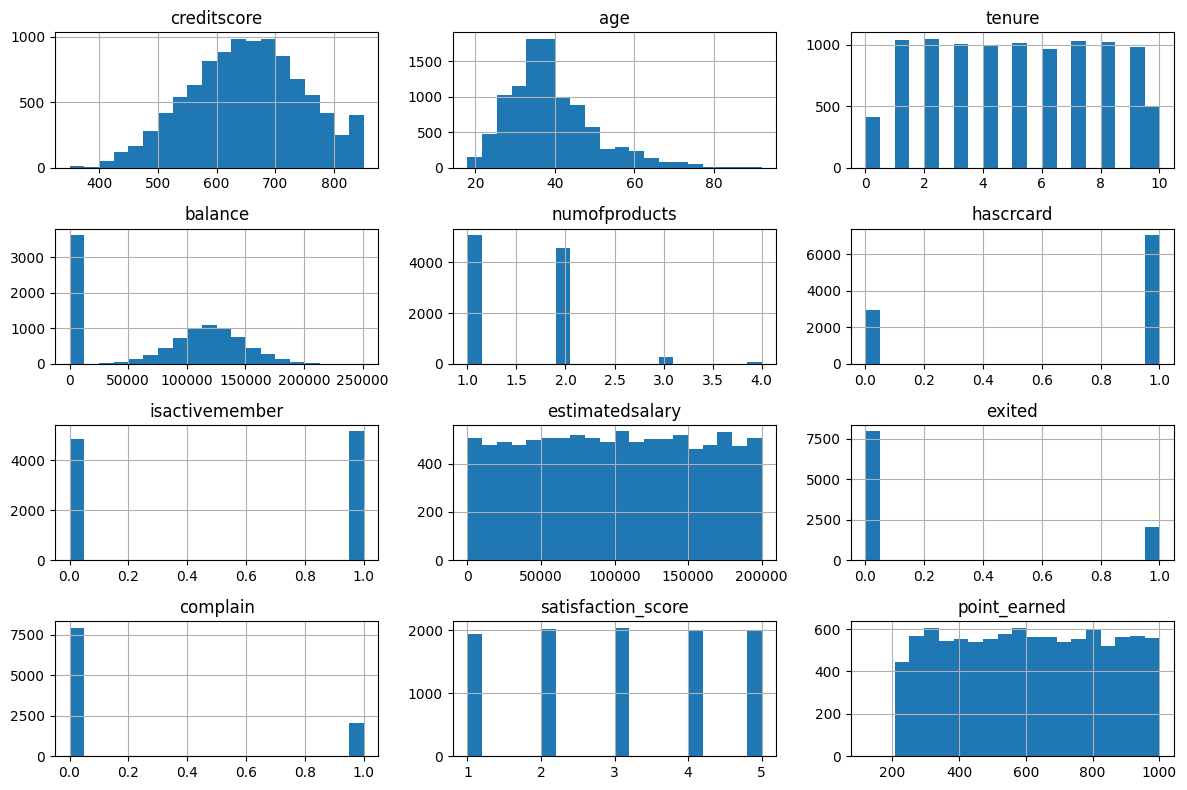

In [41]:
# Distribuição dos valores das colunas numéricas
df_numeric.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Heatmap de correlação  entre variáveis numéricas
- Valores próximos a 1 (vermelho forte): Indicam uma forte correlação positiva. Quando uma variável aumenta, a outra tende a aumentar.
- Valores próximos a -1 (azul forte): Indicam uma forte correlação negativa. Quando uma variável aumenta, a outra tende a diminuir.
- Valores próximos a 0 (tons de cinza/branco): Indicam pouca ou nenhuma correlação linear.

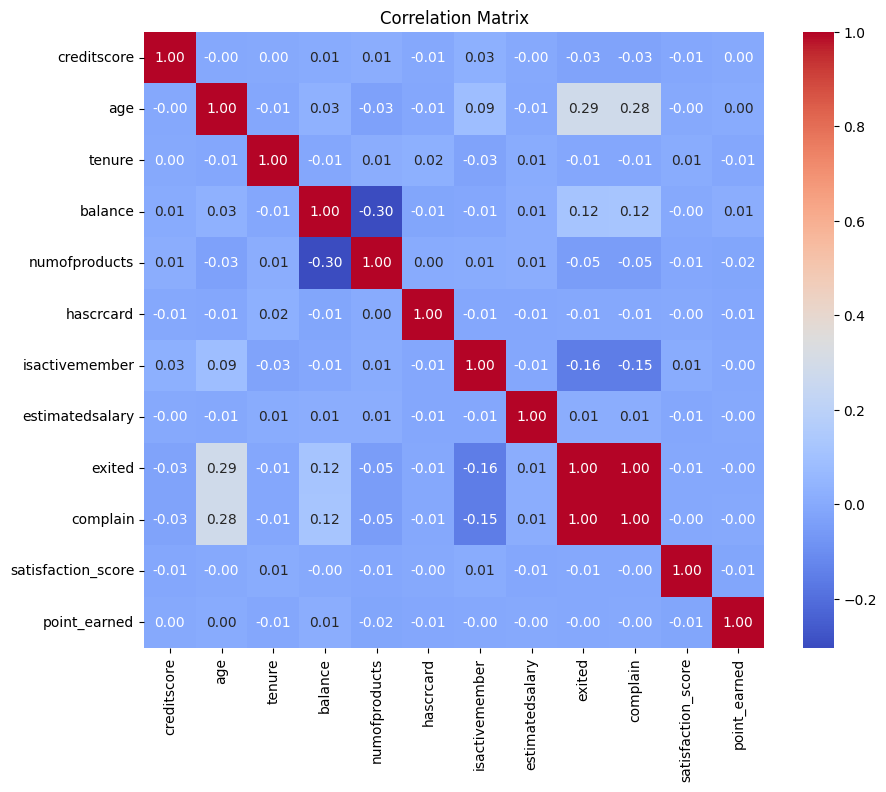

In [42]:
df_corr = df_numeric.copy()
df_corr = df_corr.corr()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Resumo da análise
- 'exited' e 'age': Correlação positiva moderada, sugerindo que, à medida que a idade do cliente aumenta, a probabilidade de churn também tende a aumentar.
- 'exited' e 'complain' (Reclamação): Correlação muito forte positiva, indicando que há uma correlação perfeita entre "reclamar" e "sair". 
- 'exited' e 'satisfaction_score': apesar de que complain indica saída quase certa do cliente, o nível de satisfação tem pouquíssima ou nenhuma correlação. Sugerindo que a forma como a satisfação é medida pode não estar sendo eficaz.


In [29]:
# 'complain' and 'exited' são altamente correlacionados e isso pode causar overfitting.
df_corr['complain'].unique()

array([-0.02704797,  0.28352989, -0.01304725,  0.11912426, -0.0463568 ,
       -0.00709521, -0.15474125,  0.01249395,  0.9956925 ,  1.        ,
       -0.00479908, -0.0028933 ])

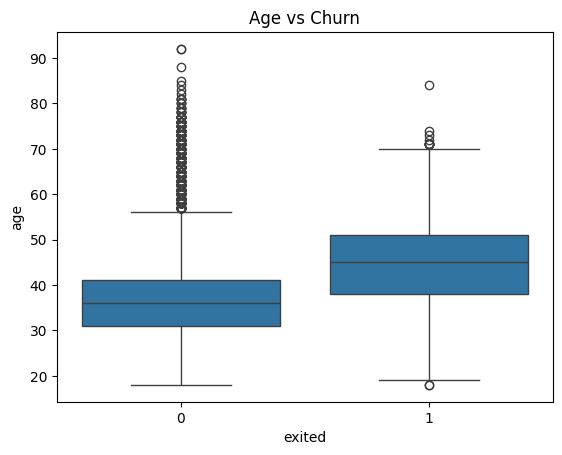

In [44]:
# Age vs Churn
sns.boxplot(x='exited', y='age', data=df)
plt.title("Age vs Churn")
plt.show()

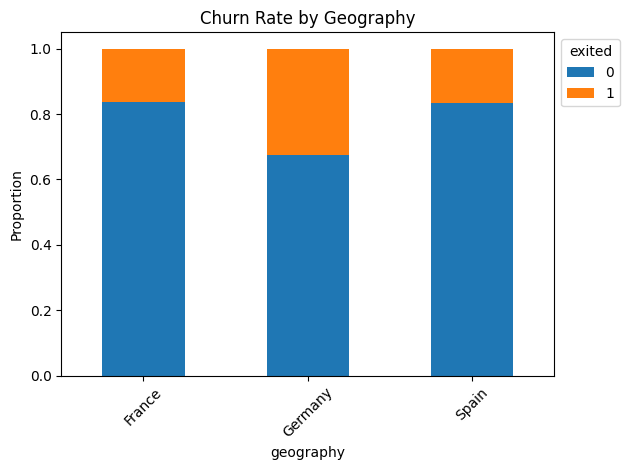

In [58]:
# Geography vs Churn (proportion)
churn_by_geography = pd.crosstab(df['geography'], df['exited'], normalize='index')

ax = churn_by_geography.plot(
    kind='bar', # Tipo do gráfico
    stacked=True, # As barras correspondentes a diferentes subcategorias serão empilhadas umas sobre as outras
    title="Churn Rate by Geography" # Adiciona o título diretamente
)

ax.legend(title='exited', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xticks(rotation=45, ha='center')
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [ ]:
# Remove colunas irrelevantes das features
# axis=1: a operação será aplicada as colunas
# inplace=True: modifica o DataFrame original diretamente

df_features = df_numeric.copy()
df_features.drop(['complain','exited'], axis=1, inplace=True)
df_features

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,satisfaction_score,point_earned
0,619,42,2,0.00,1,1,1,101348.88,2,464
1,608,41,1,83807.86,1,0,1,112542.58,3,456
2,502,42,8,159660.80,3,1,0,113931.57,3,377
3,699,39,1,0.00,2,0,0,93826.63,5,350
4,850,43,2,125510.82,1,1,1,79084.10,5,425
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,300
9996,516,35,10,57369.61,1,1,1,101699.77,5,771
9997,709,36,7,0.00,1,0,1,42085.58,3,564
9998,772,42,3,75075.31,2,1,0,92888.52,2,339


In [26]:
# label
df_target = df_numeric['exited']
df_target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: exited, Length: 10000, dtype: int64

In [36]:
# Dividir dados de treinamento e teste
# features
X = df_features
# label
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)